In [1]:
import numpy as np
import pandas as pd


df = pd.read_csv("./income_data.csv")

cols = [" lga_code17" , ' lga_name17' , ' equiv_tot_hsld_inc_fam_lone_p_grp_hslds_med_wkly_aud', ' est_p_inc_med_tot_inc_excl_gov_pnsn_aud']

sub_df = df[cols]

sub_df = sub_df.rename(columns={" lga_code17":"lga_code17",' lga_name17':'lga_name17',
                                ' equiv_tot_hsld_inc_fam_lone_p_grp_hslds_med_wkly_aud':"household_income" ,
                      ' est_p_inc_med_tot_inc_excl_gov_pnsn_aud':"personal_income"})

population_df = pd.read_csv("./population_data.csv")

cols = [" lga_code17" , " lga_name17" , ' pop_density_pop_density_p_p_km2',' est_res_pop_p_tot_num' , ' est_res_pop_p_wrking_age_pop_15_64_yrs_pr100']

pop_sub_df = population_df[cols]

pop_sub_df = pop_sub_df.rename(columns={" lga_code17":"lga_code17",' lga_name17':'lga_name17',
    ' pop_density_pop_density_p_p_km2':"population_density" ,
                                       ' est_res_pop_p_tot_num':"population",
                                      ' est_res_pop_p_wrking_age_pop_15_64_yrs_pr100':"working_age_population" })



join_df = pd.merge(pop_sub_df , sub_df , on=["lga_code17", "lga_name17"])

def is_in_income_rage(income,income_range):
    
    R = list(join_df['personal_income'].quantile(income_range))
    
    return income >= R[0] and income <= R[1]




tmp_df = join_df
tmp_df['low_income'] = tmp_df['personal_income'].map(lambda income: is_in_income_rage(income , [0,0.40]))
tmp_df['high_income'] = tmp_df['personal_income'].map(lambda income: is_in_income_rage(income , [0.80,1.0]))

In [2]:
print(list(join_df['personal_income'].quantile([0,0.40])))
print(list(join_df['personal_income'].quantile([0.85,1])))

[20329.0, 42426.2]
[53730.4, 100665.0]


In [3]:
tmp_df[tmp_df.low_income == True].sort_values(by=['population'] , ascending=False).head(60)

,lga_code17,lga_name17,population_density,population,working_age_population,household_income,personal_income,low_income,high_income
254,36720,Sunshine Coast (R),134.4,302841,61.9,785,41566.0,True,False
76,12380,Cumberland (A),3154.3,225691,68.6,736,40890.0,True,False
80,12850,Fairfield (C),2026.2,205675,67.4,630,42326.0,True,False
191,22670,Greater Dandenong (C),1236.8,160222,67.9,659,39845.0,True,False
263,33220,Fraser Coast (R),14.5,102962,57.2,585,38664.0,True,False
98,16950,Shoalhaven (C),22.3,101942,57.7,640,38791.0,True,False
221,31820,Bundaberg (R),14.7,94256,59.5,620,38891.0,True,False
103,17550,Tweed (A),71.7,93742,58.4,679,39362.0,True,False
35,15240,Mid-Coast (A),9.1,91801,54.9,591,35736.0,True,False
54,16380,Port Macquarie-Hastings (A),21.7,80073,56.0,677,39210.0,True,False


In [4]:
tmp_df[tmp_df.high_income == True].sort_values(by=['population'] , ascending=False).head(50)

,lga_code17,lga_name17,population_density,population,working_age_population,household_income,personal_income,low_income,high_income
464,89399,Unincorporated ACT,170.9,403104,68.9,1297,63061.0,False,True
48,15990,Northern Beaches (A),1044.3,265468,63.9,1266,54783.0,False,True
181,17150,Sutherland Shire (A),678.9,226461,64.3,1136,54766.0,False,True
182,17200,Sydney (C),8328.1,222717,84.7,1363,53393.0,False,True
453,57910,Stirling (C),2101.4,220073,68.1,1020,53876.0,False,True
53,16350,Penrith (C),498.1,201597,67.4,937,52203.0,False,True
259,37010,Townsville (C),51.3,191348,68.0,888,52134.0,False,True
18,14170,Inner West (A),5405.3,191194,72.6,1315,59101.0,False,True
131,21110,Boroondara (C),2945.9,177276,67.1,1298,57306.0,False,True
102,17420,The Hills Shire (A),422.0,162975,65.4,1226,54352.0,False,True


In [5]:
codes = [57910 , 17200 ,37010,21110,16550,22310,89399,25060,26350,18500,56580,25900,
        71000,27350,14170 , 15350,15950 , 14500,14700,22670,16950,11800,14850,33220,17550,
        31820,11730,12380,36720,11300,61610,34580,20740,12750,22830,24780,10250,18050,22110,
         22830,16380,35740
        ]
print(len(codes))



42


In [6]:
import numpy
len(np.unique(codes))

41

In [7]:
sub_df = tmp_df[tmp_df.lga_code17.isin(codes)]

In [8]:
sum(sub_df.low_income)

21

In [9]:
sum(sub_df.high_income)

20

In [10]:
sub_df.shape

(41, 9)

In [11]:
import couchdb
db_tweet_name = 'new_twitter_search'
db_user = 'user_ids'
db_user_name = 'admin'
db_password = "admin"

db_address = "http://%s:%s@172.26.38.116:5984/" % (db_user_name, db_password)
db_server = couchdb.Server(db_address)
db_tweet = db_server[db_tweet_name]

In [12]:
data_negative_sentiment = {}

for item in db_tweet.view("_design/application/_view/location_count_negative",group=True):
#     print(item.key,item.value)
    data_negative_sentiment[item.key] = item.value
data_negative_sentiment

{'ACT': 1318,
 'ballina': 3519,
 'bass_coast': 82,
 'boroondara': 1265,
 'bundaberg': 11829,
 'burwoord': 3441,
 'coffs_harbour': 4962,
 'cunberland': 3249,
 'darwin': 4561,
 'devonport': 3220,
 'east_gippsland': 4004,
 'eurobodalla': 3950,
 'fraser_coast': 5220,
 'glen_eira': 252,
 'greater_dandenong': 4453,
 'greater_shepparton': 4052,
 'gympie': 647,
 'inner_west': 3711,
 'ku_ring_gai': 3958,
 'lane_cove': 5282,
 'lismore': 4609,
 'lockyer_valley': 3703,
 'mildura': 3800,
 'moonee_valley': 10198,
 'mosman': 71,
 'nedlands': 3636,
 'noosa': 3722,
 'north_sydney': 44,
 'port_macquaire_hastings': 30,
 'port_phillip': 3699,
 'randwick': 2386,
 'shoalhaven': 4505,
 'stirling': 1317,
 'stonnington': 4330,
 'sunshine_coast': 3068,
 'sydney': 1280,
 'townsville': 1233,
 'tweed': 4880,
 'waverley': 3959,
 'woollahra': 3813,
 'yarra': 4509}

In [13]:

data_total = {}

for item in db_tweet.view('_design/application/_view/location_count_all',group=True):
#     print(item.key,item.value)
    data_total[item.key] = item.value
data_total

{'ACT': 7619,
 'ballina': 21939,
 'bass_coast': 501,
 'boroondara': 8532,
 'bundaberg': 77000,
 'burwoord': 21005,
 'coffs_harbour': 29252,
 'cunberland': 21244,
 'darwin': 29662,
 'devonport': 21238,
 'east_gippsland': 24233,
 'eurobodalla': 25520,
 'fraser_coast': 27864,
 'glen_eira': 1790,
 'greater_dandenong': 27637,
 'greater_shepparton': 26614,
 'gympie': 3656,
 'inner_west': 24285,
 'ku_ring_gai': 25086,
 'lane_cove': 30668,
 'lismore': 24134,
 'lockyer_valley': 24497,
 'mildura': 24450,
 'moonee_valley': 64966,
 'mosman': 470,
 'nedlands': 27722,
 'noosa': 23245,
 'north_sydney': 289,
 'port_macquaire_hastings': 198,
 'port_phillip': 28630,
 'randwick': 16021,
 'shoalhaven': 24755,
 'stirling': 8926,
 'stonnington': 29959,
 'sunshine_coast': 20888,
 'sydney': 9171,
 'townsville': 8900,
 'tweed': 27130,
 'waverley': 23393,
 'woollahra': 27121,
 'yarra': 28043}

In [37]:
len(data_total.keys())

41

In [16]:
sub_df['new_name']=sub_df.lga_name17.apply(lambda x:x.rsplit(" ",1)[0].lower().replace(" ",'_'))

/Users/ethanchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
sub_df.new_name[464] = 'ACT'

/Users/ethanchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ethanchen/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
sub_df.head()

,lga_code17,lga_name17,population_density,population,working_age_population,household_income,personal_income,low_income,high_income,new_name
2,10250,Ballina (A),88.7,42993,58.7,745,39782.0,True,False,ballina
18,14170,Inner West (A),5405.3,191194,72.6,1315,59101.0,False,True,inner_west
23,14500,Ku-ring-gai (A),1433.9,122472,61.9,1512,58598.0,False,True,ku-ring-gai
27,14700,Lane Cove (A),3597.0,37694,68.1,1578,67210.0,False,True,lane_cove
29,14850,Lismore (C),34.3,44122,64.1,683,40074.0,True,False,lismore


In [19]:
df1 = pd.DataFrame(data_total.values(),data_total.keys(),columns=['Total_count'])
df1['name'] = data_total.keys()
df2 = pd.DataFrame(data_negative_sentiment.values() , data_negative_sentiment.keys(),columns=['Negative_count'])
df2['name'] = data_negative_sentiment.keys()

In [20]:
df3 = df1.merge(df2 , left_on='name',right_on='name')

In [21]:
df3.name
df3.name[4]='burwood'
df3.name[19] = 'port_macquarie-hastings'
df3.name[5]='cumberland'
df3.name[13] =  'ku-ring-gai'


/Users/ethanchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ethanchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ethanchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys

In [22]:
df4 = sub_df.merge(df3 , left_on='new_name',right_on='name')
df4

,lga_code17,lga_name17,population_density,population,working_age_population,household_income,personal_income,low_income,high_income,new_name,Total_count,name,Negative_count
0,10250,Ballina (A),88.7,42993,58.7,745,39782.0,True,False,ballina,21939,ballina,3519
1,14170,Inner West (A),5405.3,191194,72.6,1315,59101.0,False,True,inner_west,24285,inner_west,3711
2,14500,Ku-ring-gai (A),1433.9,122472,61.9,1512,58598.0,False,True,ku-ring-gai,1790,ku-ring-gai,252
3,14850,Lismore (C),34.3,44122,64.1,683,40074.0,True,False,lismore,24134,lismore,4609
4,15350,Mosman (A),3498.1,30260,63.8,1766,74068.0,False,True,mosman,470,mosman,71
5,15950,North Sydney (A),6848.3,71809,73.2,1764,72915.0,False,True,north_sydney,289,north_sydney,44
6,16380,Port Macquarie-Hastings (A),21.7,80073,56.0,677,39210.0,True,False,port_macquarie-hastings,30668,port_macquarie-hastings,5282
7,16550,Randwick (C),4099.0,148922,71.9,1196,57927.0,False,True,randwick,16021,randwick,2386
8,11300,Burwood (A),5406.2,38536,72.8,876,41388.0,True,False,burwood,77000,burwood,11829
9,11800,Coffs Harbour (C),63.6,74670,60.9,701,39529.0,True,False,coffs_harbour,29252,coffs_harbour,4962


In [23]:
for n in df3.name:
#     print(n)
    if not n in list(df4.name):
        print(n)

cunberland
gympie
ku_ring_gai
port_macquaire_hastings


In [24]:
df4['percetange_negative'] = df4.Negative_count/df4.Total_count

In [25]:
df4.head()

,lga_code17,lga_name17,population_density,population,working_age_population,household_income,personal_income,low_income,high_income,new_name,Total_count,name,Negative_count,percetange_negative
0,10250,Ballina (A),88.7,42993,58.7,745,39782.0,True,False,ballina,21939,ballina,3519,0.160399
1,14170,Inner West (A),5405.3,191194,72.6,1315,59101.0,False,True,inner_west,24285,inner_west,3711,0.152810
2,14500,Ku-ring-gai (A),1433.9,122472,61.9,1512,58598.0,False,True,ku-ring-gai,1790,ku-ring-gai,252,0.140782
3,14850,Lismore (C),34.3,44122,64.1,683,40074.0,True,False,lismore,24134,lismore,4609,0.190975
4,15350,Mosman (A),3498.1,30260,63.8,1766,74068.0,False,True,mosman,470,mosman,71,0.151064


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams['figure.dpi'] = 110

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225]), <a list of 10 Text xticklabel objects>)

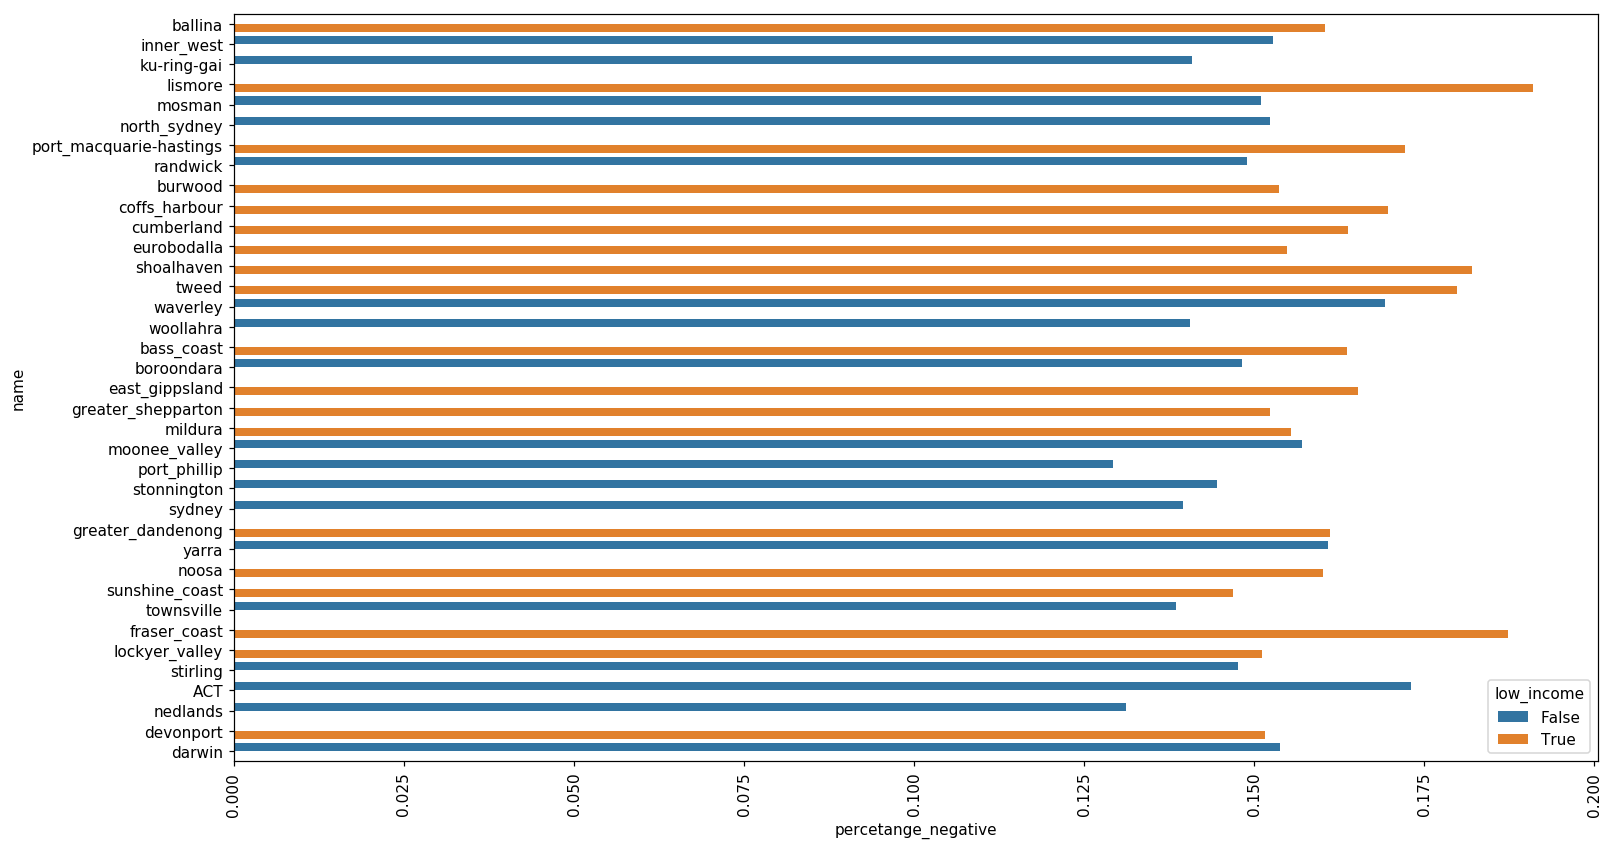

In [29]:


ax = sns.barplot(x="percetange_negative", y='name',hue='low_income', data=df4)
plt.xticks(rotation=90)

In [35]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)



In [31]:
df4.columns

Index(['lga_code17', 'lga_name17', 'population_density', 'population',
       'working_age_population', 'household_income', 'personal_income',
       'low_income', 'high_income', 'new_name', 'Total_count', 'name',
       'Negative_count', 'percetange_negative'],
      dtype='object')

/Users/ethanchen/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ethanchen/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


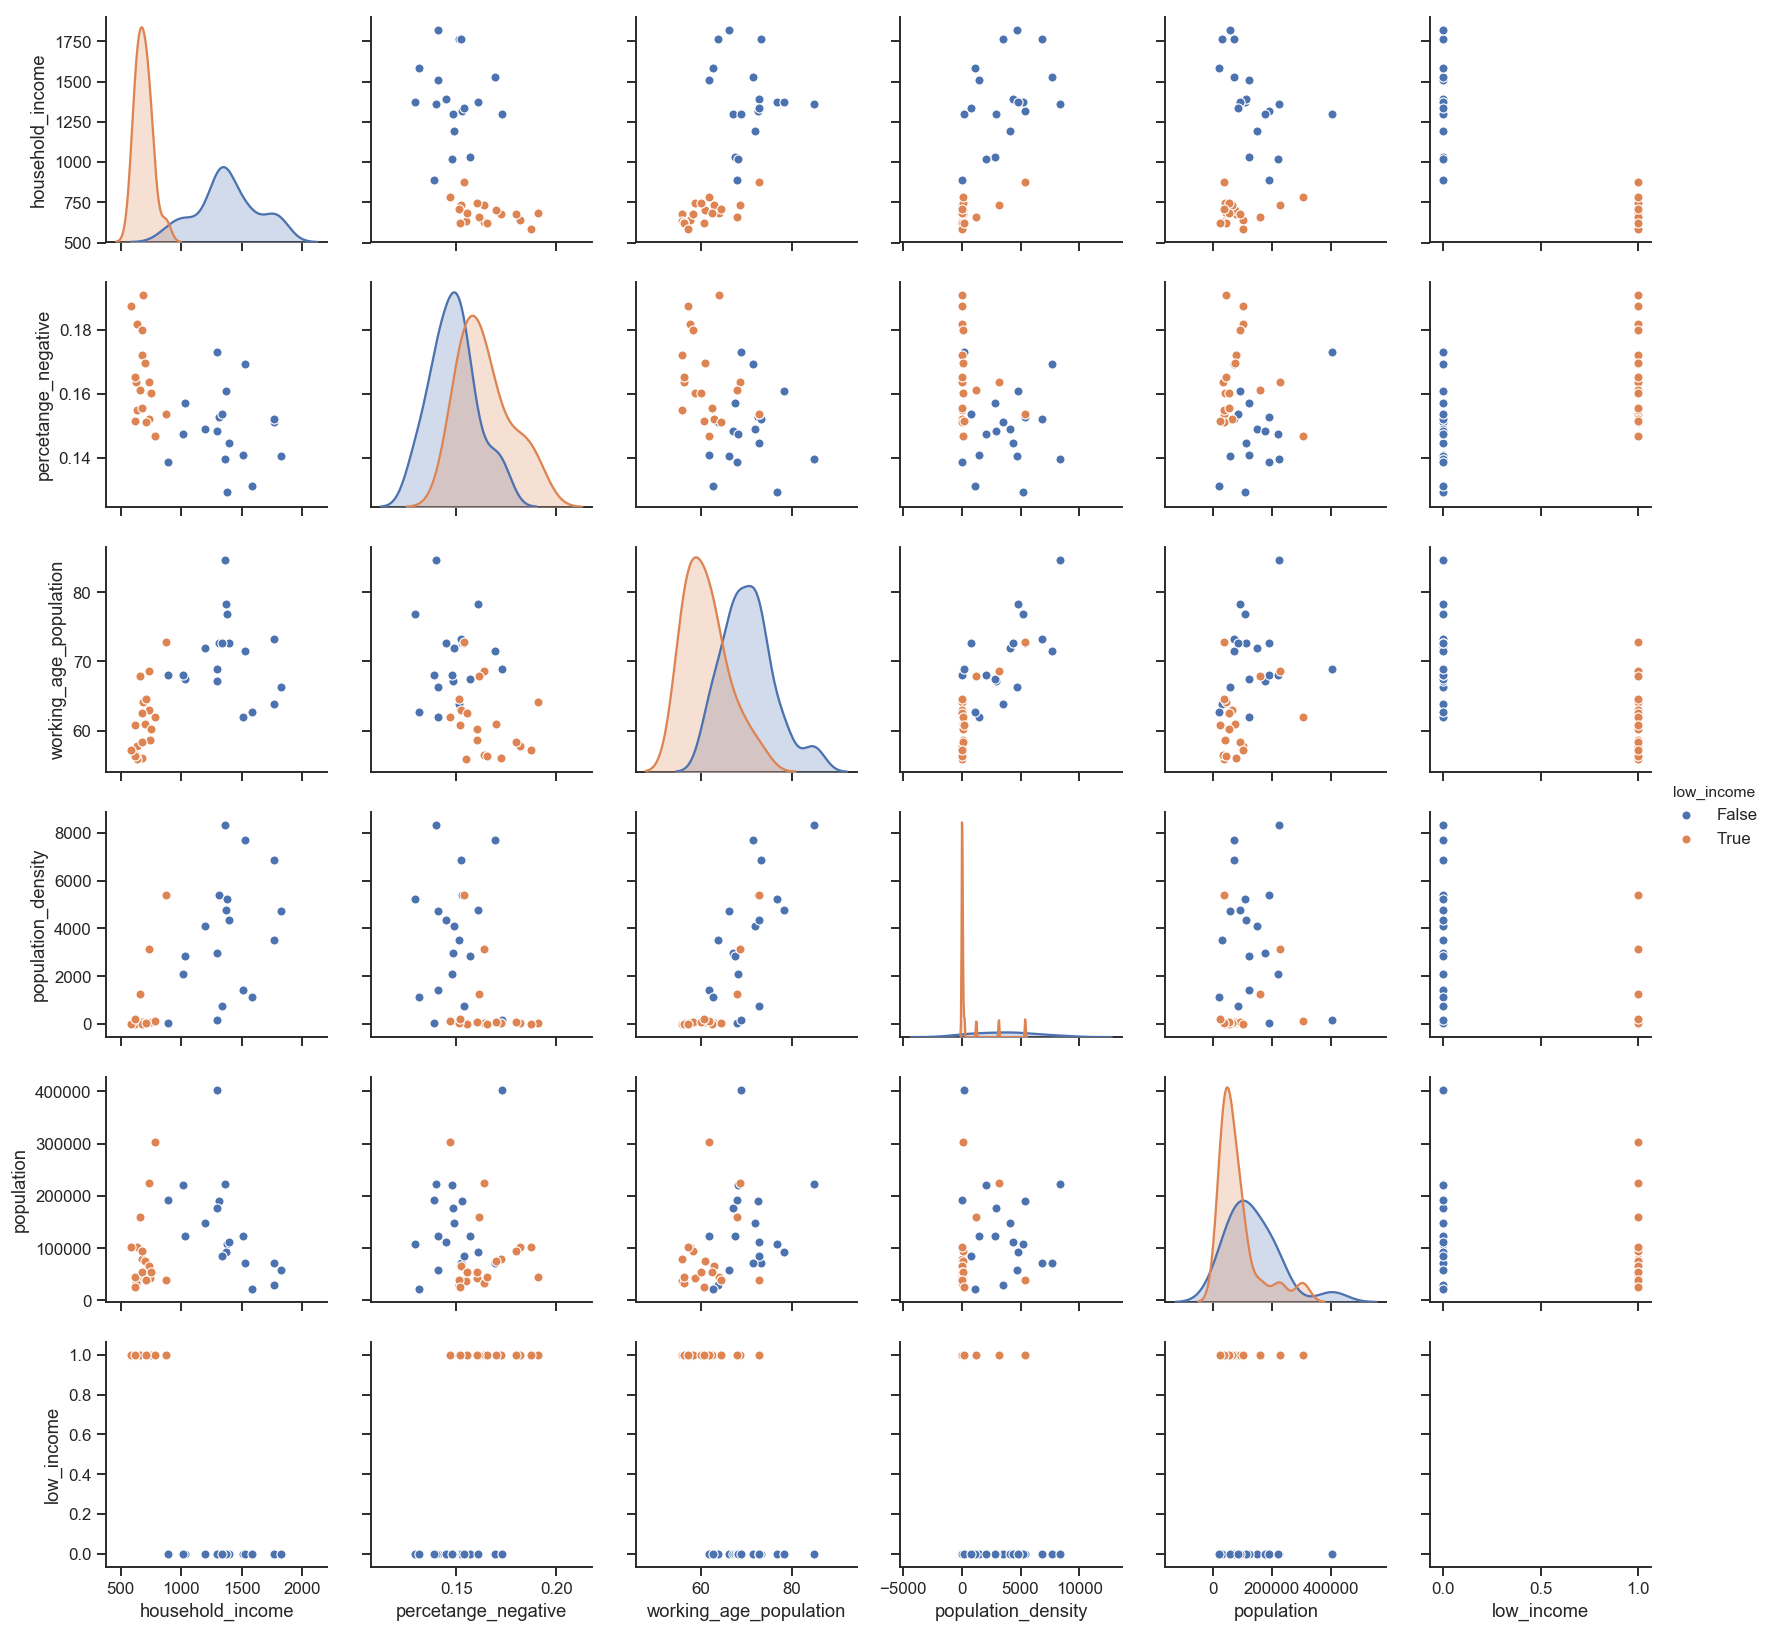

In [34]:


df4_sub = df4[['household_income','percetange_negative',
               'working_age_population','population_density','population',"low_income"]]

g = sns.pairplot(df4_sub ,hue="low_income")